# Project 3 - Milestone3
# Title - IPL(Indian Premier League) Match Predictive Analysis

Author: Venkat Jagadeesh Jampani <br>
Date: 5/29/2024 <br>

### Data Exploration

In [1]:
## Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
## Load source dataset and create dataframe ipl_matches
ipl_matches=pd.read_csv("all_season_summary.csv")

In [3]:
## Check sample records from the dataframe head
ipl_matches.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,...,"Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,177/5,...,"Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,205/2,...,"Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,158/6,...,"Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,210/6,...,"Kane Williamson (UKN),Abhishek Sharma (AR),Rah...","Jos Buttler (UKN),Yashasvi Jaiswal (UKN),Sanju...","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",29 March 2022 - night match (20-over match),Ulhas Gandhe,Bruce Oxenford,KN Ananthapadmanabhan,Shakti Singh,Saidharshan Kumar


In [3]:
ipl_matches.tail()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
953,2008,336012,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"55th match (D/N), Indian Premier League at Ben...",RCB,MI,MI,BOWL FIRST,122/9,...,"Mark Boucher (BT),Shreevats Goswami (WK),Misba...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Dwayne Smith",28 May 2008 - day/night match (20-over match),Billy Bowden,Arani Jayaprakash,Billy Doctrove,Sir Clive Lloyd,None
954,2008,336019,Kings XI Punjab v Rajasthan Royals,KXIP v RR,"56th match (N), Indian Premier League at Mohal...",KXIP,RR,RR,BOWL FIRST,221/3,...,"Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...","Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...","Niraj Patel,Yusuf Pathan","Shane Watson,Yusuf Pathan",28 May 2008 - night match (20-over match),Krishna Hariharan,Steve Davis,Daryl Harper,Srinivas Venkataraghavan,MS Mahal
955,2008,336038,Delhi Daredevils v Rajasthan Royals,DC v RR,"1st Semi-Final (N), Indian Premier League at M...",DC,RR,DC,BOWL FIRST,192/9,...,"Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Shane Watson,Yusuf Pathan","Shane Watson,Munaf Patel",30 May 2008 - night match (20-over match),Billy Bowden,Rudi Koertzen,Billy Doctrove,Javagal Srinath,None
956,2008,336039,Chennai Super Kings v Kings XI Punjab,CSK v KXIP,"2nd Semi-Final (N), Indian Premier League at M...",CSK,KXIP,KXIP,BAT FIRST,112/8,...,"Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...","Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...","Ramesh Powar,Wilkin Mota","Irfan Pathan,Vikram Singh",31 May 2008 - night match (20-over match),Asad Rauf,Daryl Harper,Krishna Hariharan,Srinivas Venkataraghavan,None
957,2008,336040,Chennai Super Kings v Rajasthan Royals,CSK v RR,"Final (N), Indian Premier League at Mumbai, Ju...",CSK,RR,RR,BOWL FIRST,163/5,...,"Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...","Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...","Yusuf Pathan,Swapnil Asnodkar","Yusuf Pathan,Shane Watson",1 June 2008 - night match (20-over match),Billy Bowden,Rudi Koertzen,Daryl Harper,Javagal Srinath,MR Singh


In [4]:
## check shape or size of the dataframe
ipl_matches.shape

(958, 45)

In [5]:
## check info of the dataframe
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            958 non-null    int64  
 1   id                958 non-null    int64  
 2   name              958 non-null    object 
 3   short_name        958 non-null    object 
 4   description       958 non-null    object 
 5   home_team         958 non-null    object 
 6   away_team         958 non-null    object 
 7   toss_won          958 non-null    object 
 8   decision          958 non-null    object 
 9   1st_inning_score  950 non-null    object 
 10  2nd_inning_score  948 non-null    object 
 11  home_score        950 non-null    object 
 12  away_score        948 non-null    object 
 13  winner            958 non-null    object 
 14  result            958 non-null    object 
 15  start_date        958 non-null    object 
 16  end_date          958 non-null    object 
 1

### EDA

In [6]:
## Remove any unwanted columns -- drop coluns

ipl_matches.drop(columns=["id","reserve_umpire","referee","tv_umpire","umpire2","umpire1","match_days",
                          "away_key_bowler","away_playx1","away_key_batsman","home_playx1","home_key_bowler",
                          "home_key_batsman","highlights","away_boundaries","away_wickets","away_runs",
                         "away_overs","home_boundaries","home_wickets","home_runs","home_overs","super_over",
                         "points","pom","away_captain","home_captain","start_date","end_date","home_score",
                         "away_score","venue_id"],inplace=True)
ipl_matches.shape

(958, 13)

In [7]:
## Check columns with null values
null_columns=ipl_matches.isnull().sum()
print(null_columns[null_columns > 0])

1st_inning_score     8
2nd_inning_score    10
dtype: int64


In [8]:
ipl_matches.head()

,season,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,venue_name
0,2022,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,133/4,KKR,KKR won by 6 wkts (9b rem),"Wankhede Stadium, Mumbai"
1,2022,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,177/5,179/6,DC,Capitals won by 4 wkts (10b rem),"Brabourne Stadium, Mumbai"
2,2022,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,205/2,208/5,PBKS,Punjab Kings won by 5 wkts (6b rem),"Dr DY Patil Sports Academy, Navi Mumbai"
3,2022,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,158/6,161/5,GT,Titans won by 5 wkts (2b rem),"Wankhede Stadium, Mumbai"
4,2022,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,210/6,149/7,RR,Royals won by 61 runs,"Maharashtra Cricket Association Stadium, Pune"


### Visualizations

In [9]:
## Checking stats for Toss affecting the win.
toss_won_df = ipl_matches.groupby(['toss_won']).winner.value_counts().reset_index(name="count")
toss_won_df['result']=np.where(toss_won_df.winner==toss_won_df.toss_won,'won','lost')
toss_won_result_df = toss_won_df.groupby(['toss_won','result'])['count'].sum().reset_index()


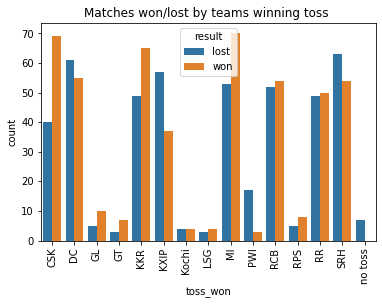

In [10]:
## Visualization
plot = sns.barplot(x="toss_won", y="count", hue="result", data=toss_won_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_won_result_df['toss_won'].unique(),rotation=90)
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_34716/1309432646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_won == venue_toss_decision_result.winner) & (venue_toss_decision_result.decision=="BOWL FIRST"),"field_won","bat_won")


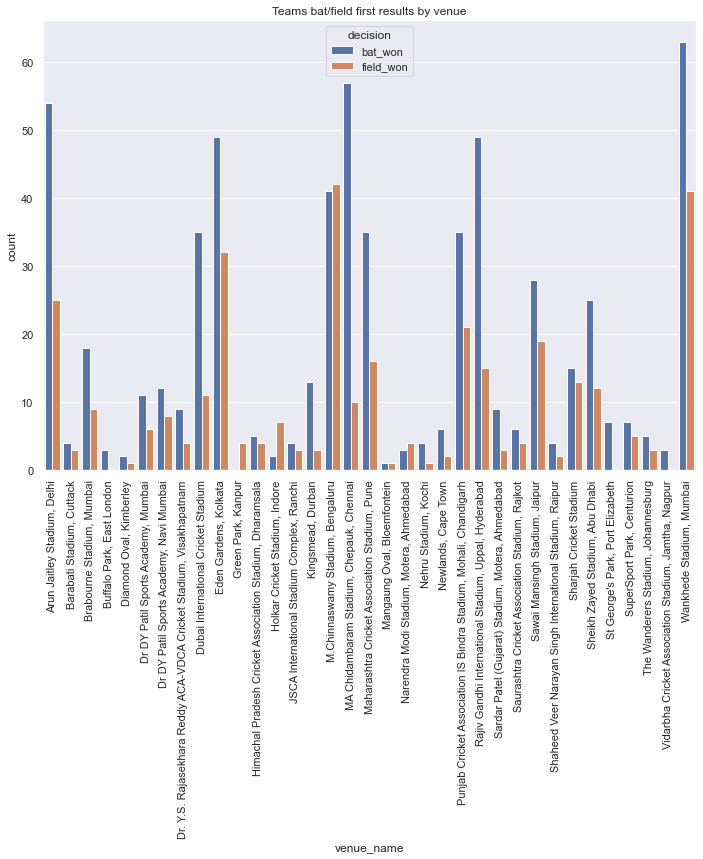

In [11]:
## Checking Winning stats of teams by venue
venue_toss_decision_result=ipl_matches[["toss_won","decision","winner","venue_name"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_won == venue_toss_decision_result.winner) & (venue_toss_decision_result.decision=="BOWL FIRST"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue_name"]).decision.value_counts().reset_index(name="count")
#Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(x="venue_name", y="count", hue="decision", data=venue_result)
plot.set_title('Teams bat/field first results by venue')
plot.set_xticklabels(venue_result['venue_name'].unique(),rotation=90)
plt.show()

Text(0.5, 1.0, 'No of matches won by different teams')

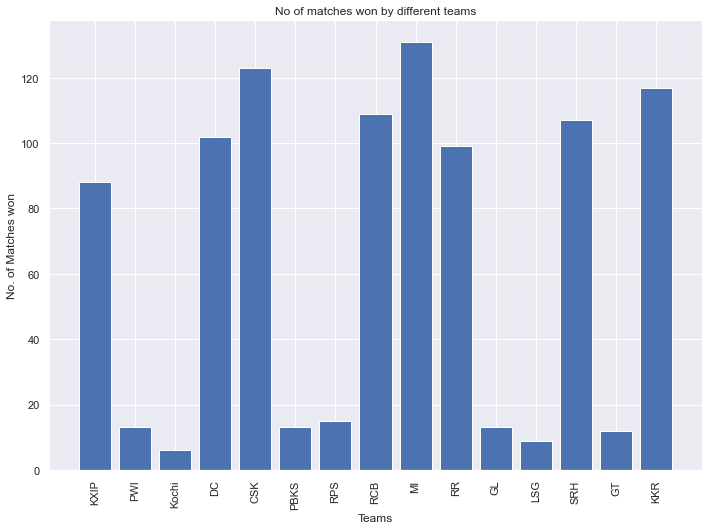

In [12]:
## Checking # of matches won by different teams
teams = list(set(ipl_matches.loc[:,'home_team']))
matches_won = [len(ipl_matches.loc[ipl_matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

### Prediction

In [12]:
## Encoding the numerical values
encoder= LabelEncoder()
ipl_matches["home_team"]=encoder.fit_transform(ipl_matches["home_team"])
ipl_matches["away_team"]=encoder.fit_transform(ipl_matches["away_team"])
ipl_matches["winner"]=encoder.fit_transform(ipl_matches["winner"].astype(str))
ipl_matches["toss_won"]=encoder.fit_transform(ipl_matches["toss_won"])
ipl_matches["venue_name"]=encoder.fit_transform(ipl_matches["venue_name"])


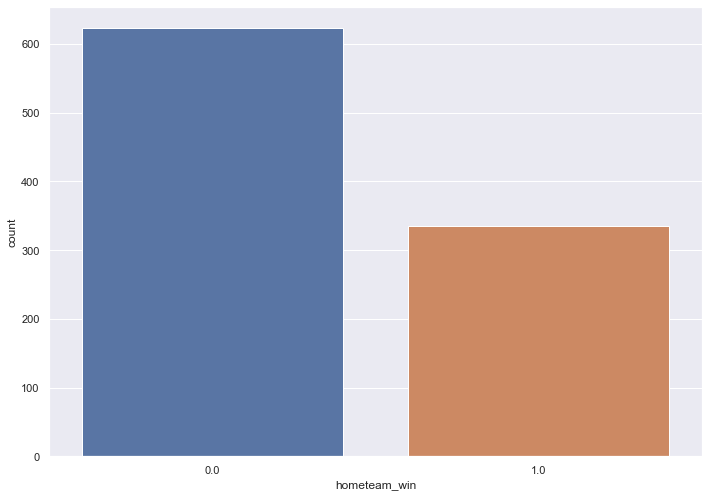

In [13]:
## outcome variable 'hometeam_win' as a probability of home_team winning the match
ipl_matches.loc[ipl_matches["winner"]==ipl_matches["home_team"],"hometeam_win"]=1
ipl_matches.loc[ipl_matches["winner"]!=ipl_matches["home_team"],"hometeam_win"]=0

## Checking the distribution of the dataset
sns.countplot(x="hometeam_win",data=ipl_matches)
plt.show()

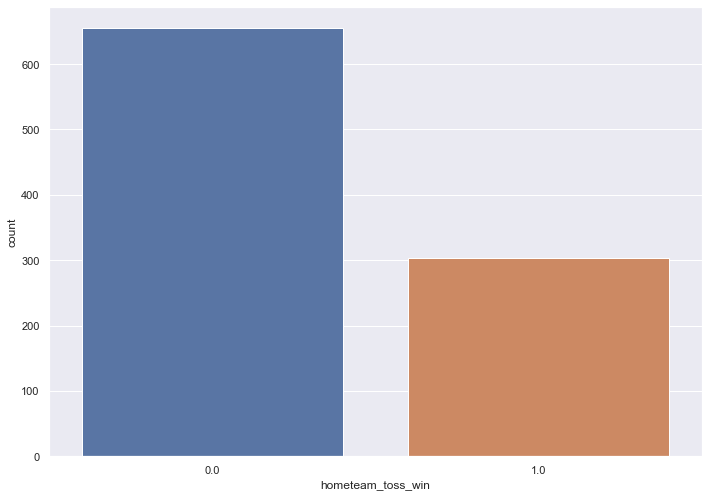

In [14]:
## outcome variable 'hometeam_toss_win' as a probability of home_team winning the toss
ipl_matches.loc[ipl_matches["toss_won"]==ipl_matches["home_team"],"hometeam_toss_win"]=1
ipl_matches.loc[ipl_matches["toss_won"]!=ipl_matches["home_team"],"hometeam_toss_win"]=0

## Checking the distribution of the dataset
sns.countplot(x="hometeam_toss_win",data=ipl_matches)
plt.show()

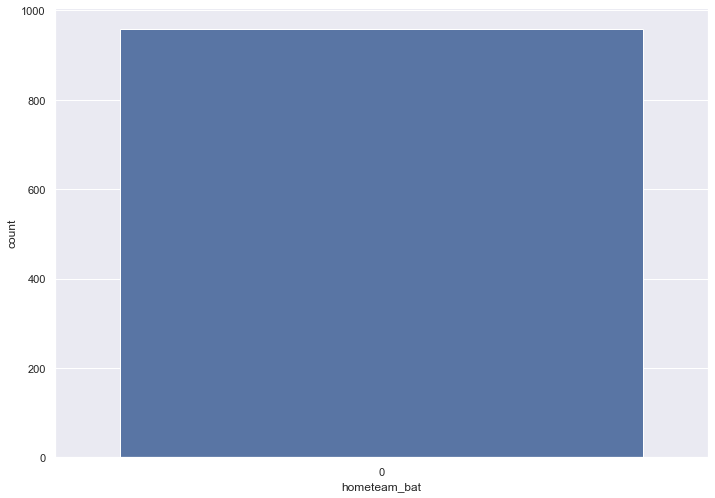

In [15]:
## outcome variable 'hometeam_bat' as a probability of home_team batting first
ipl_matches["hometeam_bat"]=0
ipl_matches.loc[(ipl_matches["hometeam_toss_win"]==1) & (ipl_matches["decision"]=="bat"),"hometeam_bat"]=1

## Checking the distribution of the dataset
sns.countplot(x="hometeam_bat",data=ipl_matches)
plt.show()

In [16]:
## Create a prediction dataframe with all required and related features
prediction_df=ipl_matches[["home_team","away_team","hometeam_toss_win","hometeam_bat","hometeam_win","venue_name"]]

In [17]:
## Dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('hometeam_win', axis=1).corr()
correlation_matrix



,home_team,away_team,hometeam_toss_win,hometeam_bat,venue_name
home_team,1.000000,-0.142251,-0.423365,NaN,0.271405
away_team,-0.142251,1.000000,0.106037,NaN,-0.043951
hometeam_toss_win,-0.423365,0.106037,1.000000,NaN,-0.055695
hometeam_bat,NaN,NaN,NaN,NaN,NaN
venue_name,0.271405,-0.043951,-0.055695,NaN,1.000000


In [18]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)

,home_team,away_team,hometeam_toss_win,hometeam_bat,hometeam_win,venue_name
0,0,4,0.0,0,0.0,34
1,1,8,1.0,0,1.0,2
2,9,11,0.0,0,0.0,6
3,3,7,1.0,0,1.0,34
4,14,13,0.0,0,1.0,17
...,...,...,...,...,...,...
953,11,8,0.0,0,0.0,15
954,5,13,0.0,0,1.0,22
955,1,13,1.0,0,0.0,34
956,0,5,0.0,0,1.0,34


In [19]:
## feature selection
X = prediction_df.drop('hometeam_win', axis=1)
target = prediction_df['hometeam_win']
target=target.astype(int)

### Modeling

In [20]:
## Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
## Apply Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[95 29]
 [31 37]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       124
           1       0.56      0.54      0.55        68

    accuracy                           0.69       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.69      0.69      0.69       192

Accuracy of logistic regression classifier on test set: 0.6875


In [22]:
## Apply SVM
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

[[79 45]
 [15 53]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.72       124
           1       0.54      0.78      0.64        68

    accuracy                           0.69       192
   macro avg       0.69      0.71      0.68       192
weighted avg       0.73      0.69      0.69       192

Accuracy of SVM classifier on test set: 0.6875


In [23]:
## Apply Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[90 34]
 [32 36]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       124
           1       0.51      0.53      0.52        68

    accuracy                           0.66       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.66      0.66       192

Accuracy of decision tree classifier on test set: 0.6562


In [24]:
## Apply Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[91 33]
 [29 39]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       124
           1       0.54      0.57      0.56        68

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192

Accuracy of random forest classifier on test set: 0.6771


##### Observation: It is clear from the results that SVM has 68%  of accuracy and Logistic Regression with 68% and Decision tree with 65% and Random forest with 67% of accuracy for this data distribution.